<a href="https://colab.research.google.com/github/zhfrn16/bigdata/blob/main/regresi%20linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

#untuk mengimpor dataset
dataset = pd.read_csv('/content/gdrive/My Drive/prices-split-adjusted.csv')

#untuk menampilkan 5 data teratas dari dataset.
dataset.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
# melihat deskripsi data
dataset.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


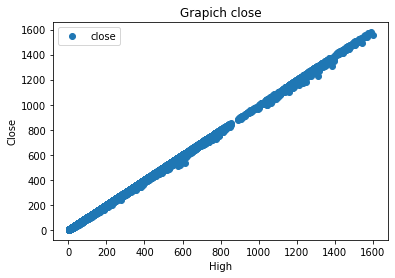

In [7]:
#  memvisualisasikan data diatas
dataset.plot(x='high', y='close', style='o')
plt.title('Grapich close')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

In [8]:
#menampilkan 5 data awal
datasets = dataset[["close", "high"]]
datasets.head()

,close,high
0,125.839996,126.250000
1,119.980003,125.540001
2,114.949997,119.739998
3,116.620003,117.440002
4,114.970001,117.330002


In [9]:
# pemilihan data sumbu X dan Y
x = datasets.iloc[:,:-1].values
y = datasets.iloc[:, 1].values

In [10]:
# split data dengan train_test_split, perbandingan 0,2=test dan 0,8=train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [11]:
# import library Regresi Linear
from sklearn.linear_model import LinearRegression
lireg=LinearRegression() # initialize the model
lireg.fit(x_train,y_train) # fit he model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# prediksi
y_pred=lireg.predict(x_test) 
dataframe = pd.DataFrame({'Y-test' : y_test, 'Y-pred' : y_pred})
dataframe

,Y-test,Y-pred
0,45.799999,45.835434
1,64.690002,65.202844
2,111.779999,111.718933
3,41.000000,41.112168
4,42.439999,42.817795
...,...,...
170248,40.650002,41.041521
170249,83.480003,83.561002
170250,47.709999,47.954851
170251,71.379997,71.742746


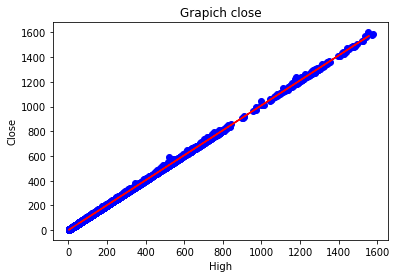

In [13]:
#  visualisasi test data
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, lireg.predict(x_train), color = 'red' )
plt.title('Grapich close')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

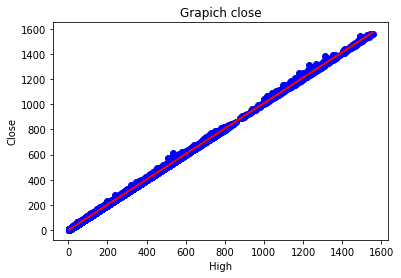

In [14]:
#  visualisasi train data
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, lireg.predict(x_train), color = 'red' )
plt.title('Grapich close')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()